<a href="https://colab.research.google.com/github/AAdewunmi/Online-Course-Recommendation-App-Project/blob/main/EDA_On_UdemyDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Udemy Dataset Exploratory Data Analysis (EDA) README

## Overview

This project performs **Exploratory Data Analysis (EDA)** on a Udemy courses dataset. The goal is to uncover insights about course content, pricing, subscribers, and trends across time and categories. The analysis leverages Python’s data analysis stack to answer a set of guiding business and product questions.

## Objectives

The notebook investigates questions such as:

* **Course Titles**: frequent words, longest/shortest titles, title-based recommendation ideas.
* **Subjects/Categories**: distribution across categories, popularity trends per year, subscriber preferences.
* **Published Year**: growth of courses over time, identification of peak years.
* **Levels**: distribution of course difficulty levels and their popularity.
* **Duration**: how course length correlates with subscribers and pricing.
* **Subscribers**: most popular courses, average subscribers, breakdown per subject/year.
* **Pricing**: average, minimum, maximum prices, revenue estimates, most profitable courses.
* **Correlations**: relationship between subscribers and reviews, price, lectures, and duration.

## Tech Stack

* **Python 3.x**
* **Jupyter Notebook**
* Libraries:

  * `pandas` for data manipulation
  * `numpy` for numerical analysis
  * `matplotlib` / `seaborn` for visualization

## Repository Contents

* `EDA on UdemyDataset.ipynb` – the main notebook with all analysis and visualizations.
* `README.md` – this documentation.

## How to Run

1. Clone this repository.
2. Install dependencies:

   ```bash
   pip install pandas numpy matplotlib seaborn jupyter
   ```
3. Launch Jupyter Notebook:

   ```bash
   jupyter notebook
   ```
4. Open and run all cells in `EDA on UdemyDataset.ipynb`.

## Insights (Expected Outcomes)

* Identification of which subjects and years drive Udemy’s growth.
* Understanding of how pricing and duration influence subscriber numbers.
* Discovery of correlations between course metrics (reviews, lectures, duration, price) and popularity.
* Recommendations for content strategy and pricing models.

---




#**Exploratory Data Analysis on UdemyCleanedTitle Dataset**

**Questions to Solve**

* Course Title

  * What is the most frequent words in course title
  * Longest/Shortest course title
  * How can we build recommendation systems via title using similarity
  * Most famous courses by number of subscribers

* Subjects/Category

  * What is the distribution of subjects
  * How many courses per subject
  * Distribution of subjects per year
  * How many people purchase a particular subject
  * Which subject is the most popular

* Published Year

  * Number of courses per year
  * Which year has the highest number of courses
  * What is the trend of courses per year

* Levels

  * How many levels do we have
  * What is the distribution of courses per levels
  * Which subject have the highest levels
  * How many subscribers per levels
  * How many courses per levels

* Duration of Course

  * Which courses have the highest duration (paid or not)
  * Which courses have higher duration
  * Duration vs number of subscribers

* Subscribers

  * Which course have the highest number of subscribers
  * Average number of subscribers
  * Number of subscribers per Subject
  * Number of subscribers per year

* Price

  * What is the average price of a course
  * What is the min/max price
  * How much does Udemy earn
  * The most profitable courses

* Correlation Questions

  * Does number of subscribers depend on
  * number of reviews
  * price
  * number of lectures
  * content duration

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read file and print first 5 rows

df = pd.read_csv('sample_data/udemy_course_data.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [ ]:
# Print a concise summary of a DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

#**EDA on Subject/Category**

* Subjects/Category
  * What is the distribution of subjects
  * How many courses per subject
  * Distribution of subjects per year
  * How many people purchase a particular subject
  * Which subject is the most popular

In [4]:
# Count unique course titles

len(df['course_title'].unique())

3668

<Axes: xlabel='subject', ylabel='count'>

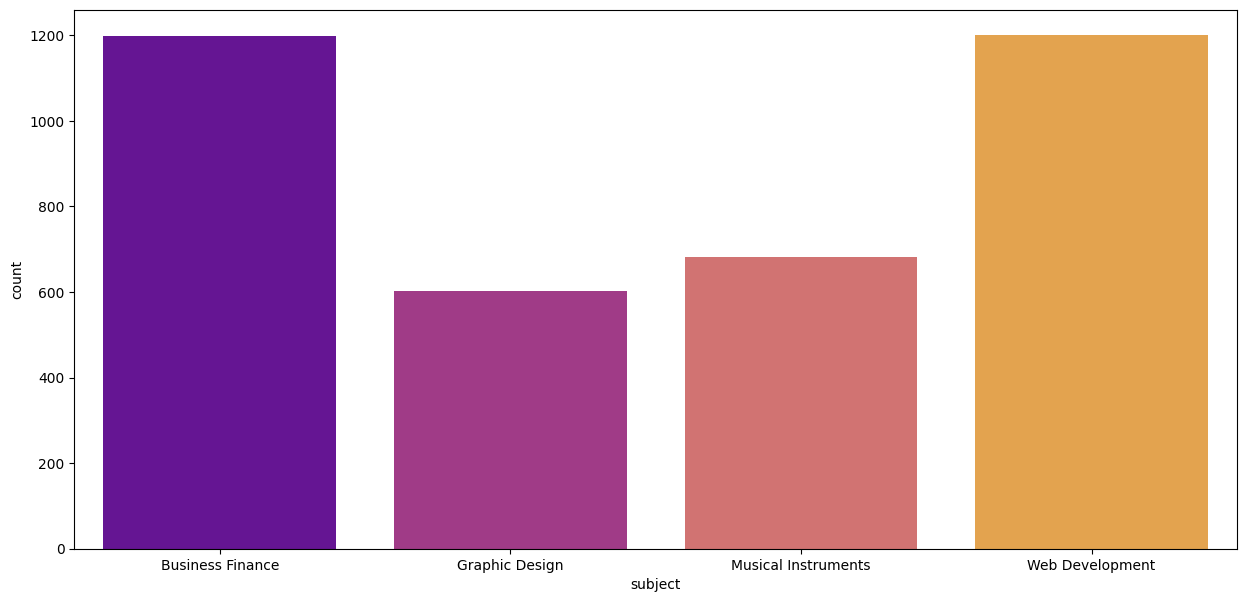

In [7]:
# Visualisation for course subjects

plt.figure(figsize=(15,7))
sn.countplot(x=df['subject'],hue=df['subject'],legend=False,palette='plasma')

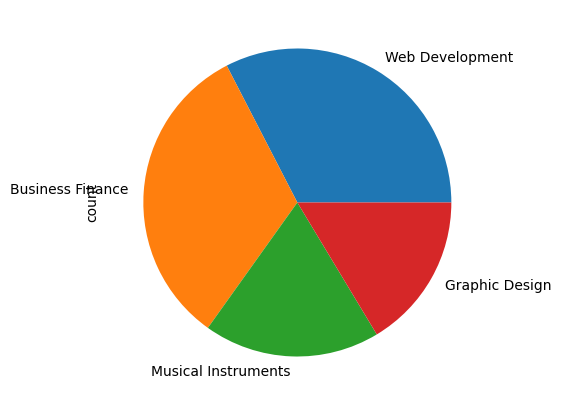

In [9]:
# Pie chart visualisation of subjects

plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

#**EDA on Subscribers**
* Subscribers
  * Which course have the highest number of subscribers
  * Average number of subscribers
  * Number of subscribers per Subject
  * Number of subscribers per year

<Axes: ylabel='subject'>

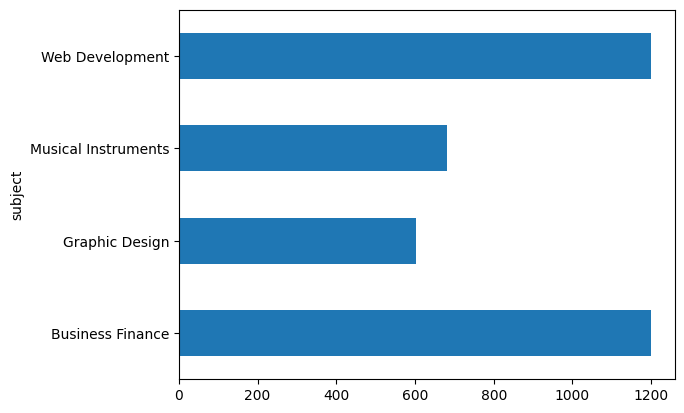

In [12]:
# Horizontal bar chart showing the number of courses
# available for each subject

df.groupby('subject')['num_subscribers'].count().plot(kind='barh')

<Axes: ylabel='subject'>

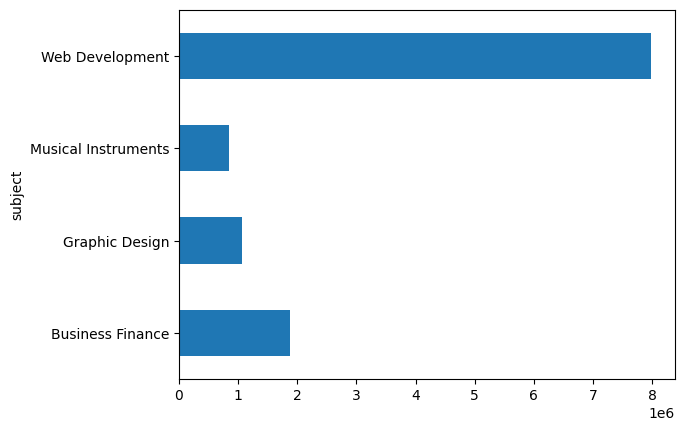

In [13]:
# Visualization for total subscribers by subject"

df.groupby('subject')['num_subscribers'].sum().plot(kind='barh')

<Axes: ylabel='num_subscribers'>

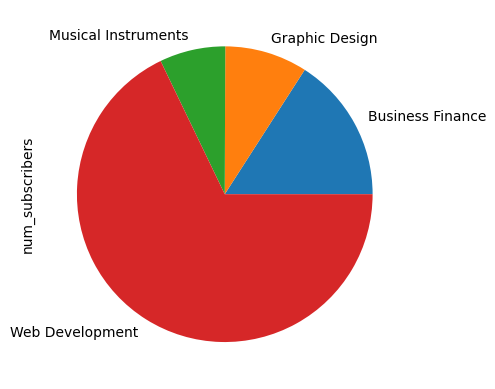

In [14]:
# Pie chart of total subscribers per subject

df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')

#**EDA on Levels**
* Levels
  * How many levels do we have
  * What is the distribution of courses per levels
  * Which subject have the highest levels
  * How many subscribers per levels
  * How many courses per levels

<Axes: ylabel='level'>

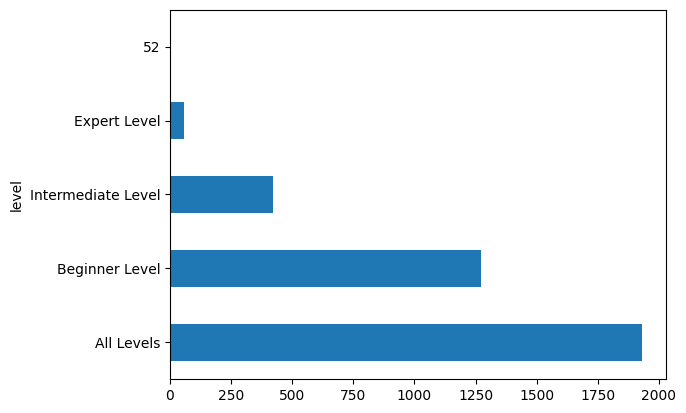

In [15]:
# Visualize count of each level as horizontal bar chart

df['level'].value_counts().plot(kind='barh')

<Axes: ylabel='level'>

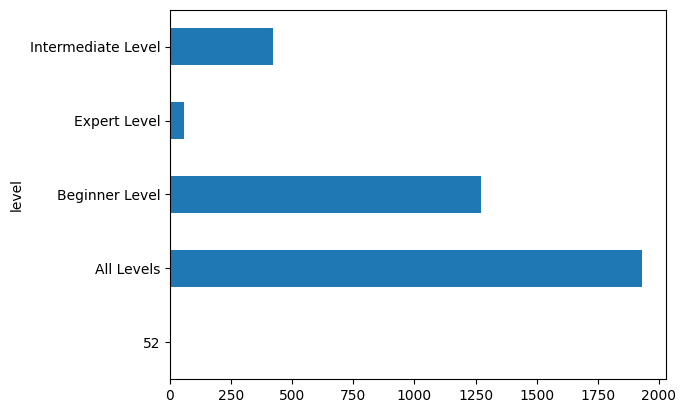

In [16]:
# Grouping the level as per persons interest

df.groupby(['level'])['num_subscribers'].count().plot(kind='barh')

<Axes: xlabel='level'>

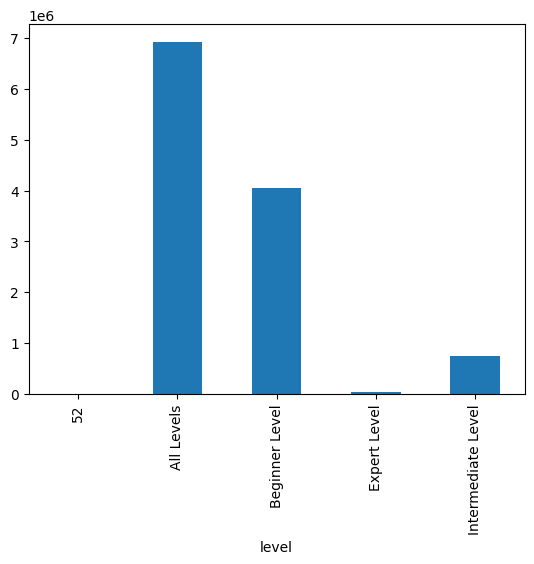

In [17]:
# Plot total subscribers per level as bar chart

df.groupby(['level'])['num_subscribers'].sum().plot(kind='bar')

<Axes: xlabel='subject'>

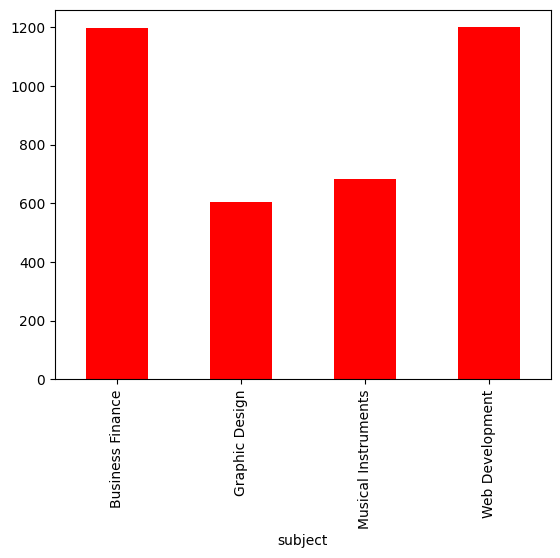

In [18]:
# Show count of levels by subject as red bar chart

df.groupby(['subject'])['level'].count().plot(kind='bar',color='red')

Text(0, 0.5, 'Count of Levels')

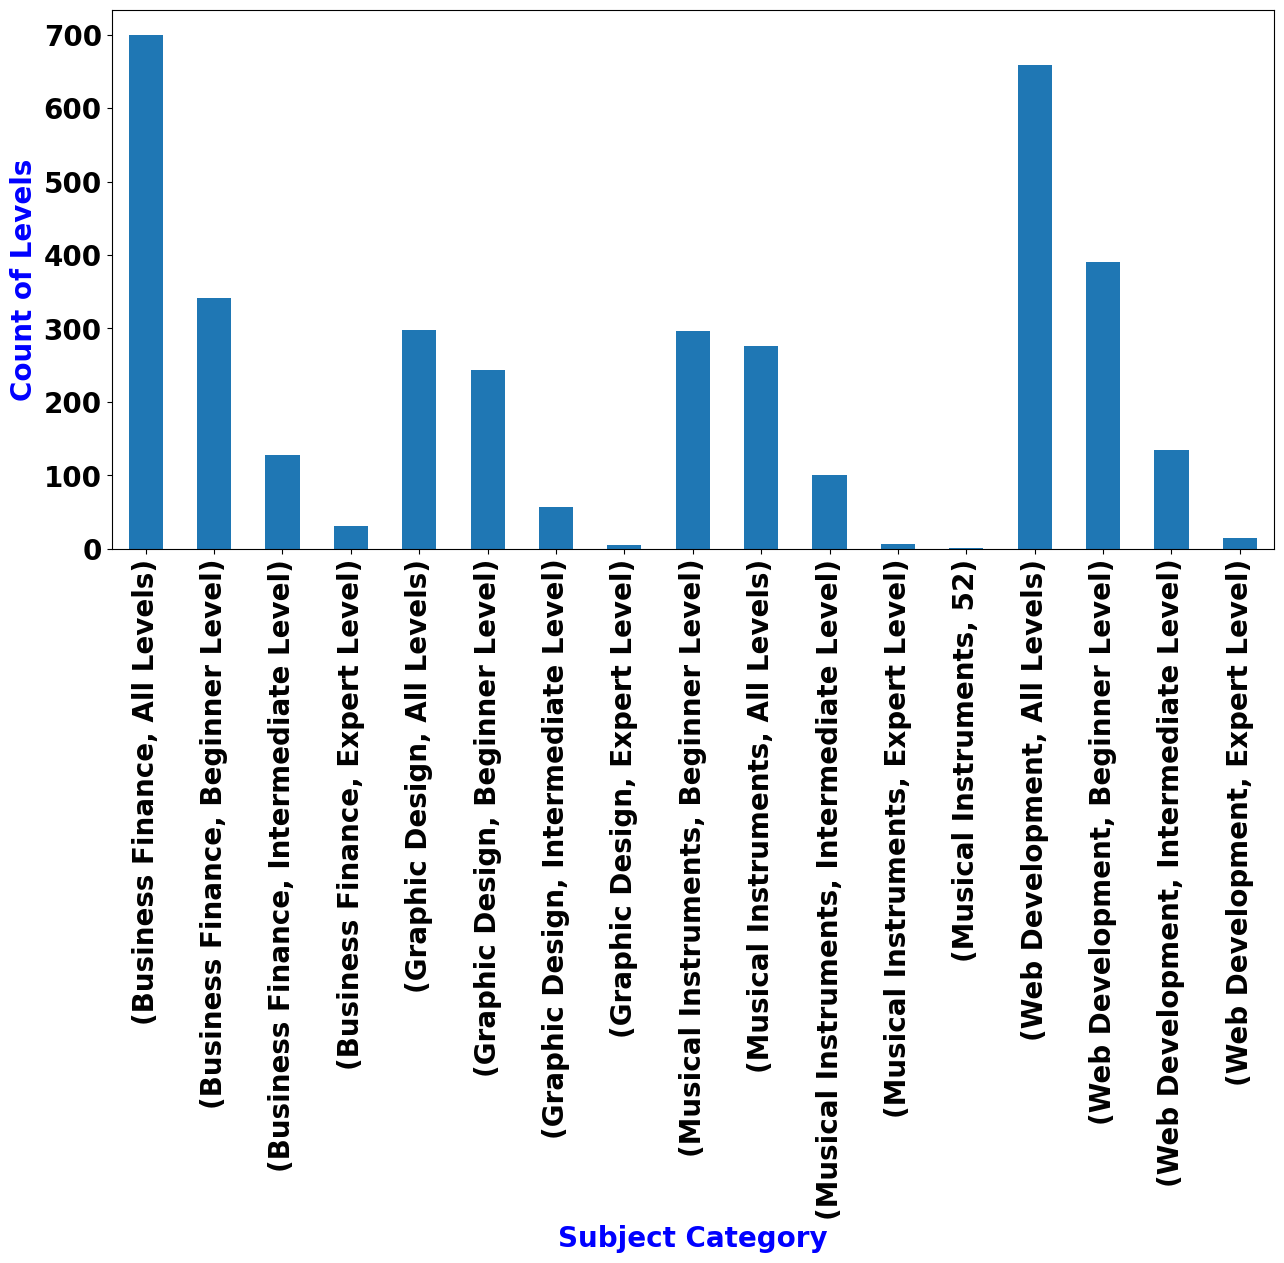

In [19]:
# Grouped level count bar chart with custom axis formatting

plt.figure(figsize=(15,7))
df.groupby(['subject'])['level'].value_counts().plot(kind='bar')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.xlabel('Subject Category',fontsize=20,fontweight='bold',color='blue')
plt.ylabel('Count of Levels', fontsize=20,fontweight='bold',color='blue')